In [2]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import quad

In [3]:
start = 0
finish = 5
step = 0.01

# ЗАДАНИЕ 1

![Alt text](image.png)

In [4]:
def b_n(myFunction, n, w, t0, T):
    integral = lambda t: myFunction(t) * np.sin(n * w * t)
    res = quad(integral, t0, t0 + T)[0]
    return 2/T * res 

def a_n(myFunction, n, w, t0, T):
    integral = lambda t: myFunction(t) * np.cos(n * w * t)
    res = quad(integral, t0, t0 + T)[0]
    return 2/T * res 

def calculate_furie(t, myFunction, w, w2, T, t0, N):
    a0 = a_n(myFunction, 0, w, t0, T)
    An = np.array([a_n(myFunction, n, w, t0, T) * np.cos(n * w * t) for n in range(1, N)])
    Bn = np.array([b_n(myFunction, n, w2, t0, T) * np.sin(n * w2 * t) for n in range(1, N)])
    sigma = An.sum() + Bn.sum()
    return a0/2 + sigma

def DFT_slow(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

C:\Users\emelianov_aa\AppData\Local\Temp\ipykernel_19044\1611033537.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  res = quad(integral, t0, t0 + T)[0]


смотрим диаграмму новой функции Аcos


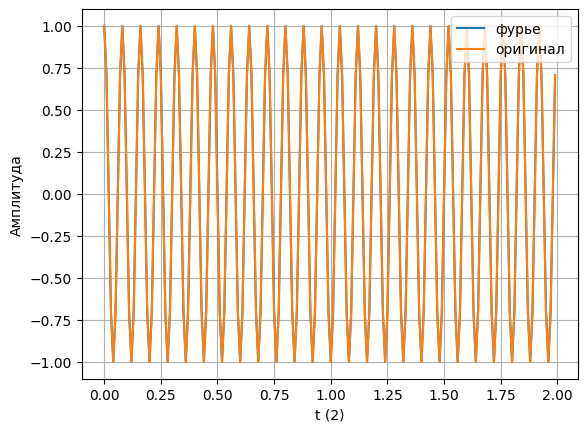

In [5]:
def x(w):
    return lambda t: np.cos(t * w)

start = 0
finish = 2
step = 0.01
T = 2
N = 10
w = 2 * np.pi / T
t0 = 0

w = 50 * np.pi / T
w2 = 150 * np.pi / T

main_function = x(w)

list_point = []
time_series = np.arange(start, finish, step)
for t in time_series:
    list_point.append(calculate_furie(t, main_function, w, w2, T, 0, 10))

originsignal_copy = np.array([main_function(t) for t in time_series])

print("смотрим диаграмму новой функции Аcos")
plt.plot(time_series, list_point, label='фурье')
plt.plot(time_series, originsignal_copy, label='оригинал')
plt.xlabel('t (2)')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

In [48]:
print('Время выполнения 1 - dft, 2 - fft')
%timeit DFT_slow(origin_signal)

# 0.00229 секунды

Время выполнения 1 - dft, 2 - fft
2.35 ms ± 67.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [49]:
%timeit np.fft.fft(origin_signal)

# 0.000005 секунды

4.13 µs ± 123 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# Ответ 1(а)

In [50]:
dif = 0.00229 / 0.000005
print('fft faster in ', dif)

fft faster in  457.99999999999994


# Ответ 1(б) - результат не поменялся

смотрим спектры моего преобразования фурье и в библиотеке fft


c:\Users\emelianov_aa\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


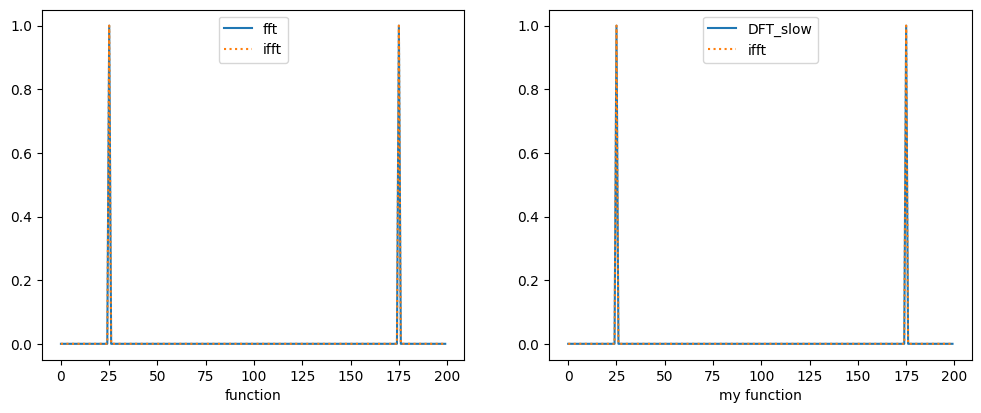

In [7]:
print("смотрим спектры моего преобразования фурье и в библиотеке fft")

fig = plt.figure(figsize=(12, 10))

plt.subplots_adjust(wspace=0.2, hspace=0.2)

origin_signal = originsignal_copy

spectr = np.fft.fft(origin_signal)
spectr_i = np.fft.ifft(origin_signal)
plt.subplot(221)
plt.plot(spectr/np.max(spectr), label='fft')
plt.plot(spectr_i/np.max(spectr_i), label='ifft',  linestyle='dotted')
plt.xlabel('function')
plt.legend()

spectr2 = DFT_slow(origin_signal)
plt.subplot(222)
plt.plot(spectr2/np.max(spectr2), label='DFT_slow')
plt.plot(spectr_i/np.max(spectr_i), label='ifft',  linestyle='dotted')
plt.xlabel('my function')
plt.legend()
plt.show()

# Ответ 1 (в) Спектры с шумом

смотрим спектры моего преобразования фурье и в библиотеке fft


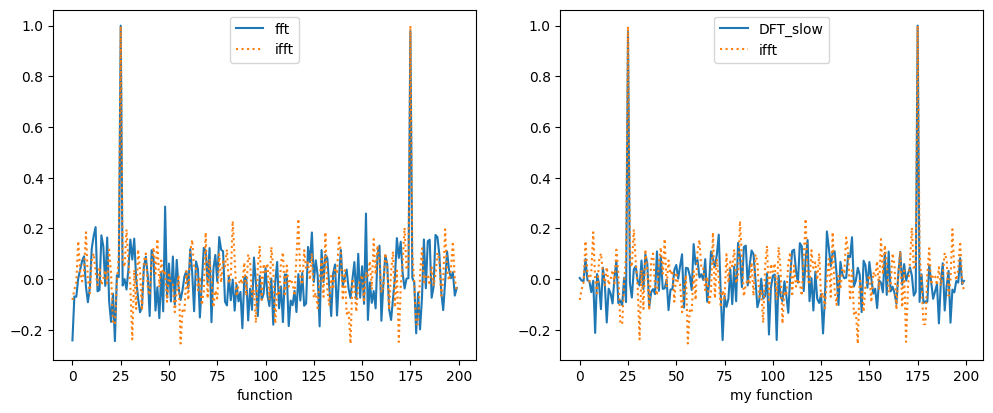

In [8]:
print("смотрим спектры моего преобразования фурье и в библиотеке fft")

fig = plt.figure(figsize=(12, 10))

plt.subplots_adjust(wspace=0.2, hspace=0.2)

spectr = np.fft.fft(origin_signal + np.random.normal(0, 1, origin_signal.shape))
spectr_i = np.fft.ifft(origin_signal + np.random.normal(0, 1, origin_signal.shape))
plt.subplot(221)
plt.plot(spectr/np.max(spectr), label='fft')
plt.plot(spectr_i/np.max(spectr_i), label='ifft',  linestyle='dotted')
plt.xlabel('function')
plt.legend()

spectr2 = DFT_slow(origin_signal + np.random.normal(0, 1, origin_signal.shape))
plt.subplot(222)
plt.plot(spectr2/np.max(spectr2), label='DFT_slow')
plt.plot(spectr_i/np.max(spectr_i), label='ifft',  linestyle='dotted')
plt.xlabel('my function')
plt.legend()
plt.show()

![Alt text](image-1.png)

In [9]:
A = 2
T = 2
start = 0
finish = 4
step = 0.01
N = 10
w = 2 * np.pi / T
t0 = 0

w = 50 * np.pi / T
w2 = 50 * np.pi / T

def x2(t):
    t = np.floor(t)
    if t % T == 0:
        return A
    else:
        return 0

origin_signal = np.array([x2(t) for t in time_series])

# Ответ 2

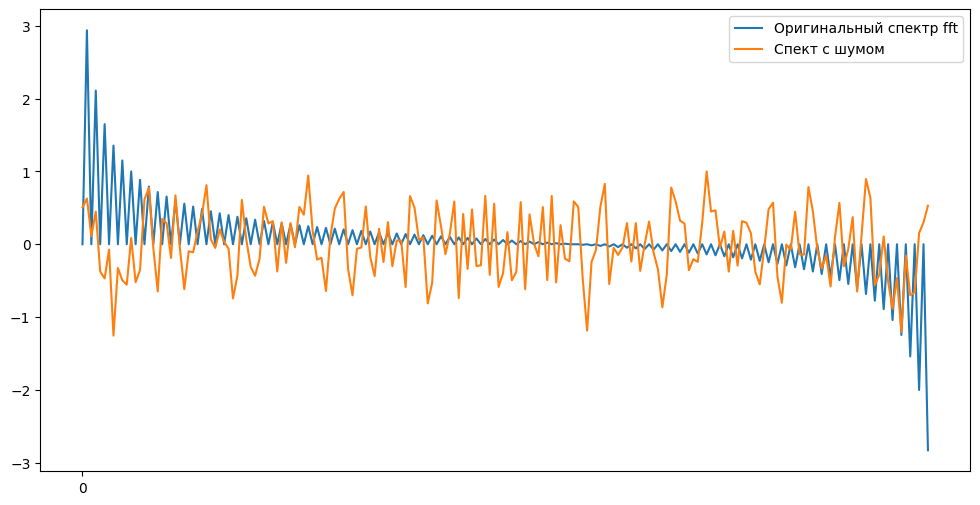

In [12]:
noise = np.random.normal(0, 1, origin_signal.shape)

noise_signal = origin_signal + noise

spectr_impulse_dft = DFT_slow(origin_signal)[4:-4]
spectr_impulse_fft = np.fft.fft(origin_signal)[4:-4]
noised_impulse_fft = np.fft.fft(noise_signal)[4:-4]


fig = plt.figure(figsize=(12, 6))

plt.plot(spectr_impulse_fft/np.max(spectr_impulse_fft), label="Оригинальный спектр fft")
# plt.plot(spectr_impulse_dft/np.max(spectr_impulse_dft), label="Оригинальный спектр dft")
plt.plot(noised_impulse_fft/np.max(noised_impulse_fft), label="Спект с шумом")
plt.legend()
plt.xticks([0])
plt.show()

![Alt text](image-2.png)

![Alt text](image-3.png)

Суть в том что нам нужно разделить наше преобразование фурье на четные и нечетные используя 4 примера

In [64]:
# попробуем разбить преобразование Фурье на четные и не четные
def fast_fft(signal):
    signal_copy = np.asarray(signal, dtype=float)
    N = signal_copy.shape[0]

    n = np.arange(N)
    k = n.reshape(-1, 1)

    M = np.exp(-2j * np.pi * n * k / N)
    spectr = np.dot(M, signal_copy.reshape(N, -1))

    while spectr.shape[0] < N:
        spectr_even = spectr[:, :spectr.shape[1] // 2]
        spectr_odd = spectr[:, spectr.shape[1] // 2:]
        factor = np.exp(-1j * np.pi *
                        np.arange(spectr.shape[0]) / spectr.shape[0]).reshape(-1, 1)
        spectr = np.vstack(
            [spectr_even + factor * spectr_odd, spectr_even - factor * spectr_odd])

    return spectr.reshape(-1)

In [72]:
import timeit

spectr_fft_time = timeit.timeit(lambda: np.fft.fft(origin_signal), number=100)
spectr_fft = np.fft.fft(origin_signal)

spectr_myfft_time = timeit.timeit(lambda: fast_fft(origin_signal), number=100)
spectr_myfft = fast_fft(origin_signal)

print(f"fft {spectr_fft_time:.4f} секунд")
print(f"my fft {spectr_myfft_time:.4f} секунд")
print(f"fft быстрее в {spectr_fft_time/spectr_myfft_time:.1f} раз")
print(
    f"вычисление выполнено {np.allclose(fast_fft(origin_signal), np.fft.fft(origin_signal))}")

fft 0.0011 секунд
my fft 0.2195 секунд
fft быстрее в 0.0 раз
вычисление выполнено True


c:\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


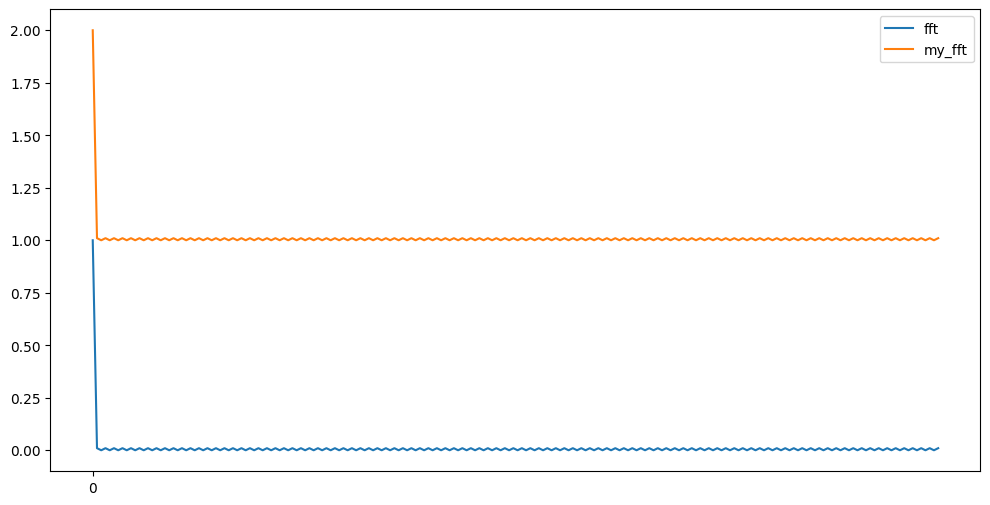

In [73]:
spectr_fft = np.fft.fft(origin_signal)
spectr_myfft= fast_fft(origin_signal)

fig = plt.figure(figsize=(12, 6))

plt.plot(spectr_fft/np.max(spectr_fft), label="fft")
plt.plot(spectr_myfft/np.max(spectr_myfft) + 1, label="my_fft")
plt.legend()
plt.xticks([0])
plt.show()